In [1]:
# Write recipe outputs
#finaldf2_models = dataiku.Dataset("finaldf2_models")
#finaldf2_models.write_with_schema(finaldf2_models_df)

# Code pipeline models

## Import packages

In [2]:
#Need version 1.19.5 of numpy for first part of code, need newer version for second part of code

In [3]:
pip list

Package            Version
------------------ -----------------
attrs              23.1.0
backcall           0.2.0
certifi            2023.5.7
charset-normalizer 3.1.0
click              8.1.3
click-plugins      1.1.1
cligj              0.7.2
cloudpickle        1.5.0
cycler             0.11.0
decorator          5.1.1
Fiona              1.9.3
Flask              1.0.4
geopandas          0.4.0
idna               3.4
imbalanced-learn   0.10.1
imblearn           0.0
importlib-metadata 6.6.0
ipykernel          4.8.2
ipython            7.34.0
ipython-genutils   0.2.0
itsdangerous       2.1.2
jedi               0.18.2
Jinja2             2.10.3
joblib             1.2.0
jupyter-client     6.1.12
jupyter_core       4.12.0
kiwisolver         1.4.4
lightgbm           3.2.1
MarkupSafe         2.0.1
matplotlib         3.1.2
matplotlib-inline  0.1.6
munch              3.0.0
notebook           5.7.16-dku-11.0-0
numpy              1.17.3
packaging          23.1
pandas             1.0.5
parso            

In [4]:
import numpy as np
print(np.__version__)

1.17.3


In [5]:
# -*- coding: utf-8 -*-
import dataiku
import pandas as pd, numpy as np
from dataiku import pandasutils as pdu

# Read recipe inputs
finaldf2 = dataiku.Dataset("finaldf2")
finaldf2_df = finaldf2.get_dataframe()


# Compute recipe outputs from inputs
# TODO: Replace this part by your actual code that computes the output, as a Pandas dataframe
# NB: DSS also supports other kinds of APIs for reading and writing data. Please see doc.

finaldf2_models_df = finaldf2_df # For this sample code, simply copy input to output

In [6]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, average_precision_score
from sklearn import metrics, preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
#from sklearn.compose import ColumnTransformer
#from sklearn.datasets import fetch_openml
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
# from sklearn.metrics import PrecisionRecallDisplay
import matplotlib.pyplot as plt

from xgboost import XGBClassifier


# # pip install imblearn
# # pip install sklego

# import imblearn
# from imblearn.pipeline import Pipeline
# from imblearn.over_sampling import SMOTE, BorderlineSMOTE, ADASYN
# from collections import Counter
# from imblearn.over_sampling import RandomOverSampler
# from imblearn.under_sampling import RandomUnderSampler

# # !pip install feature_engine
# from feature_engine.creation import CyclicalFeatures
# # !pip install tensorflow
# # !pip install keras

# from keras.models import Sequential, Model
# from keras.layers import Input, Dense, Activation
# from keras.optimizers import Adam

# #Setting up matplotlib for plots
# %matplotlib inline

# np.random.seed(42)

/home/dataiku/dss/code-envs/python/Aryana3/lib/python3.8/site-packages/ipykernel/pylab/backend_inline.py:156: DeprecationWarning: `configure_inline_support` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.configure_inline_support()`
  configure_inline_support(ip, backend)


In [7]:
finaldf2

Column,Type
Gemeente,string
beschikbare_capaciteit_afname_huidig_mva_count,string
BAG ID,string
Bouwjaar,string
Gemeentenaam2021,string
Oppervlakte [m2],string
Potentie jaarlijks opwek [kWh],string
SDE_status,string
Wijk,string
a_bed_a,string


In [8]:
#drop where 2020 is yes, so that only no yes and no no remain
#Final4_df = Final4_df[Final4_df.zonnepanelen2020_ja != 1]

# Train-Test split

In [9]:
df = finaldf2_df.drop(['BAG ID','Gemeente', 'Gemeentenaam2021', 'Wijk', 'SDE_status'], axis=1)

In [10]:
df

,beschikbare_capaciteit_afname_huidig_mva_count,Bouwjaar,Oppervlakte [m2],Potentie jaarlijks opwek [kWh],a_bed_a,a_bed_bf,a_bed_gi,a_bed_hj,a_bed_kl,a_bed_mn,a_bed_oq,a_bed_ru,a_bedv,a_inw,a_man,a_nw_all,beschermdstadgezicht_ja,bev_dich,g_ele,g_gas_hu,g_gas_ko,p_ink_hi,type_bijeenkomstfunctie,type_celfunctie,type_gezondheidszorgfunctie,type_industriefunctie,type_kantoorfunctie,type_logiesfunctie,type_onderwijsfunctie,type_overige gebruiksfunctie,type_sportfunctie,type_winkelfunctie,type_woonfunctie,sp_change
0,6,1989.0,577.53,55459.09,0.321429,0.178571,0.071429,0.000000,0.035714,0.142857,0.107143,0.107143,140.0,635.0,330.0,20.0,1.0,37.0,3880.0,1870.0,2010.0,23.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,6,1956.0,579.72,50155.88,0.014706,0.073529,0.147059,0.102941,0.117647,0.323529,0.147059,0.073529,340.0,260.0,160.0,35.0,0.0,70.0,4090.0,1940.0,2690.0,11.2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,6,1979.0,902.00,83496.28,0.000000,0.145833,0.083333,0.062500,0.104167,0.229167,0.208333,0.145833,240.0,2265.0,1070.0,200.0,0.0,1409.0,2530.0,1040.0,1660.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
3,6,1961.0,292.72,28060.30,0.000000,0.054054,0.432432,0.054054,0.108108,0.162162,0.081081,0.081081,185.0,520.0,255.0,30.0,0.0,1576.0,2590.0,900.0,800.0,29.9,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,6,1997.0,476.06,36523.48,0.014706,0.073529,0.147059,0.102941,0.117647,0.323529,0.147059,0.073529,340.0,260.0,160.0,35.0,0.0,70.0,4090.0,1940.0,2690.0,11.2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38093,6,1992.0,3639.05,355082.53,0.000000,0.125000,0.383929,0.098214,0.035714,0.169643,0.071429,0.116071,560.0,2615.0,1350.0,690.0,0.0,6224.0,2340.0,1040.0,1200.0,19.1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
38094,6,1960.0,565.42,55154.79,0.007519,0.203008,0.180451,0.067669,0.067669,0.172932,0.172932,0.127820,665.0,7410.0,3575.0,1230.0,0.0,5369.0,2260.0,1110.0,1300.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
38095,6,2001.0,319.33,27655.14,0.019231,0.346154,0.250000,0.057692,0.096154,0.153846,0.057692,0.038462,260.0,280.0,160.0,10.0,0.0,385.0,3330.0,1740.0,1670.0,19.7,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
38096,6,2021.0,504.10,15858.36,0.000000,0.200000,0.085714,0.085714,0.057143,0.228571,0.228571,0.114286,175.0,3385.0,1650.0,630.0,0.0,6762.0,2580.0,1210.0,1410.0,15.5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [11]:
df.replace('.', np.nan)

,beschikbare_capaciteit_afname_huidig_mva_count,Bouwjaar,Oppervlakte [m2],Potentie jaarlijks opwek [kWh],a_bed_a,a_bed_bf,a_bed_gi,a_bed_hj,a_bed_kl,a_bed_mn,a_bed_oq,a_bed_ru,a_bedv,a_inw,a_man,a_nw_all,beschermdstadgezicht_ja,bev_dich,g_ele,g_gas_hu,g_gas_ko,p_ink_hi,type_bijeenkomstfunctie,type_celfunctie,type_gezondheidszorgfunctie,type_industriefunctie,type_kantoorfunctie,type_logiesfunctie,type_onderwijsfunctie,type_overige gebruiksfunctie,type_sportfunctie,type_winkelfunctie,type_woonfunctie,sp_change
0,6,1989.0,577.53,55459.09,0.321429,0.178571,0.071429,0.000000,0.035714,0.142857,0.107143,0.107143,140.0,635.0,330.0,20.0,1.0,37.0,3880.0,1870.0,2010.0,23.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,6,1956.0,579.72,50155.88,0.014706,0.073529,0.147059,0.102941,0.117647,0.323529,0.147059,0.073529,340.0,260.0,160.0,35.0,0.0,70.0,4090.0,1940.0,2690.0,11.2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,6,1979.0,902.00,83496.28,0.000000,0.145833,0.083333,0.062500,0.104167,0.229167,0.208333,0.145833,240.0,2265.0,1070.0,200.0,0.0,1409.0,2530.0,1040.0,1660.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
3,6,1961.0,292.72,28060.30,0.000000,0.054054,0.432432,0.054054,0.108108,0.162162,0.081081,0.081081,185.0,520.0,255.0,30.0,0.0,1576.0,2590.0,900.0,800.0,29.9,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,6,1997.0,476.06,36523.48,0.014706,0.073529,0.147059,0.102941,0.117647,0.323529,0.147059,0.073529,340.0,260.0,160.0,35.0,0.0,70.0,4090.0,1940.0,2690.0,11.2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38093,6,1992.0,3639.05,355082.53,0.000000,0.125000,0.383929,0.098214,0.035714,0.169643,0.071429,0.116071,560.0,2615.0,1350.0,690.0,0.0,6224.0,2340.0,1040.0,1200.0,19.1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
38094,6,1960.0,565.42,55154.79,0.007519,0.203008,0.180451,0.067669,0.067669,0.172932,0.172932,0.127820,665.0,7410.0,3575.0,1230.0,0.0,5369.0,2260.0,1110.0,1300.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
38095,6,2001.0,319.33,27655.14,0.019231,0.346154,0.250000,0.057692,0.096154,0.153846,0.057692,0.038462,260.0,280.0,160.0,10.0,0.0,385.0,3330.0,1740.0,1670.0,19.7,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
38096,6,2021.0,504.10,15858.36,0.000000,0.200000,0.085714,0.085714,0.057143,0.228571,0.228571,0.114286,175.0,3385.0,1650.0,630.0,0.0,6762.0,2580.0,1210.0,1410.0,15.5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [12]:
df.dropna()

,beschikbare_capaciteit_afname_huidig_mva_count,Bouwjaar,Oppervlakte [m2],Potentie jaarlijks opwek [kWh],a_bed_a,a_bed_bf,a_bed_gi,a_bed_hj,a_bed_kl,a_bed_mn,a_bed_oq,a_bed_ru,a_bedv,a_inw,a_man,a_nw_all,beschermdstadgezicht_ja,bev_dich,g_ele,g_gas_hu,g_gas_ko,p_ink_hi,type_bijeenkomstfunctie,type_celfunctie,type_gezondheidszorgfunctie,type_industriefunctie,type_kantoorfunctie,type_logiesfunctie,type_onderwijsfunctie,type_overige gebruiksfunctie,type_sportfunctie,type_winkelfunctie,type_woonfunctie,sp_change
0,6,1989.0,577.53,55459.09,0.321429,0.178571,0.071429,0.000000,0.035714,0.142857,0.107143,0.107143,140.0,635.0,330.0,20.0,1.0,37.0,3880.0,1870.0,2010.0,23.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,6,1956.0,579.72,50155.88,0.014706,0.073529,0.147059,0.102941,0.117647,0.323529,0.147059,0.073529,340.0,260.0,160.0,35.0,0.0,70.0,4090.0,1940.0,2690.0,11.2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,6,1979.0,902.00,83496.28,0.000000,0.145833,0.083333,0.062500,0.104167,0.229167,0.208333,0.145833,240.0,2265.0,1070.0,200.0,0.0,1409.0,2530.0,1040.0,1660.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
3,6,1961.0,292.72,28060.30,0.000000,0.054054,0.432432,0.054054,0.108108,0.162162,0.081081,0.081081,185.0,520.0,255.0,30.0,0.0,1576.0,2590.0,900.0,800.0,29.9,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,6,1997.0,476.06,36523.48,0.014706,0.073529,0.147059,0.102941,0.117647,0.323529,0.147059,0.073529,340.0,260.0,160.0,35.0,0.0,70.0,4090.0,1940.0,2690.0,11.2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38093,6,1992.0,3639.05,355082.53,0.000000,0.125000,0.383929,0.098214,0.035714,0.169643,0.071429,0.116071,560.0,2615.0,1350.0,690.0,0.0,6224.0,2340.0,1040.0,1200.0,19.1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
38094,6,1960.0,565.42,55154.79,0.007519,0.203008,0.180451,0.067669,0.067669,0.172932,0.172932,0.127820,665.0,7410.0,3575.0,1230.0,0.0,5369.0,2260.0,1110.0,1300.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
38095,6,2001.0,319.33,27655.14,0.019231,0.346154,0.250000,0.057692,0.096154,0.153846,0.057692,0.038462,260.0,280.0,160.0,10.0,0.0,385.0,3330.0,1740.0,1670.0,19.7,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
38096,6,2021.0,504.10,15858.36,0.000000,0.200000,0.085714,0.085714,0.057143,0.228571,0.228571,0.114286,175.0,3385.0,1650.0,630.0,0.0,6762.0,2580.0,1210.0,1410.0,15.5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [13]:
df.isin(['.']).sum(axis=0)

/home/dataiku/dss/code-envs/python/Aryana3/lib/python3.8/site-packages/numpy/lib/arraysetops.py:568: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


beschikbare_capaciteit_afname_huidig_mva_count    0
Bouwjaar                                          0
Oppervlakte [m2]                                  0
Potentie jaarlijks opwek [kWh]                    0
a_bed_a                                           0
a_bed_bf                                          0
a_bed_gi                                          0
a_bed_hj                                          0
a_bed_kl                                          0
a_bed_mn                                          0
a_bed_oq                                          0
a_bed_ru                                          0
a_bedv                                            0
a_inw                                             0
a_man                                             0
a_nw_all                                          0
beschermdstadgezicht_ja                           0
bev_dich                                          0
g_ele                                             0
g_gas_hu    

In [14]:
df = df.replace('\.+', np.nan, regex=True)

<>:1: DeprecationWarning: invalid escape sequence \.
<ipython-input-14-f16288392f7c>:1: DeprecationWarning: invalid escape sequence \.
  df = df.replace('\.+', np.nan, regex=True)


In [15]:
df.dropna()

,beschikbare_capaciteit_afname_huidig_mva_count,Bouwjaar,Oppervlakte [m2],Potentie jaarlijks opwek [kWh],a_bed_a,a_bed_bf,a_bed_gi,a_bed_hj,a_bed_kl,a_bed_mn,a_bed_oq,a_bed_ru,a_bedv,a_inw,a_man,a_nw_all,beschermdstadgezicht_ja,bev_dich,g_ele,g_gas_hu,g_gas_ko,p_ink_hi,type_bijeenkomstfunctie,type_celfunctie,type_gezondheidszorgfunctie,type_industriefunctie,type_kantoorfunctie,type_logiesfunctie,type_onderwijsfunctie,type_overige gebruiksfunctie,type_sportfunctie,type_winkelfunctie,type_woonfunctie,sp_change
0,6,1989.0,577.53,55459.09,0.321429,0.178571,0.071429,0.000000,0.035714,0.142857,0.107143,0.107143,140.0,635.0,330.0,20.0,1.0,37.0,3880.0,1870.0,2010.0,23.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,6,1956.0,579.72,50155.88,0.014706,0.073529,0.147059,0.102941,0.117647,0.323529,0.147059,0.073529,340.0,260.0,160.0,35.0,0.0,70.0,4090.0,1940.0,2690.0,11.2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,6,1979.0,902.00,83496.28,0.000000,0.145833,0.083333,0.062500,0.104167,0.229167,0.208333,0.145833,240.0,2265.0,1070.0,200.0,0.0,1409.0,2530.0,1040.0,1660.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
3,6,1961.0,292.72,28060.30,0.000000,0.054054,0.432432,0.054054,0.108108,0.162162,0.081081,0.081081,185.0,520.0,255.0,30.0,0.0,1576.0,2590.0,900.0,800.0,29.9,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,6,1997.0,476.06,36523.48,0.014706,0.073529,0.147059,0.102941,0.117647,0.323529,0.147059,0.073529,340.0,260.0,160.0,35.0,0.0,70.0,4090.0,1940.0,2690.0,11.2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38093,6,1992.0,3639.05,355082.53,0.000000,0.125000,0.383929,0.098214,0.035714,0.169643,0.071429,0.116071,560.0,2615.0,1350.0,690.0,0.0,6224.0,2340.0,1040.0,1200.0,19.1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
38094,6,1960.0,565.42,55154.79,0.007519,0.203008,0.180451,0.067669,0.067669,0.172932,0.172932,0.127820,665.0,7410.0,3575.0,1230.0,0.0,5369.0,2260.0,1110.0,1300.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
38095,6,2001.0,319.33,27655.14,0.019231,0.346154,0.250000,0.057692,0.096154,0.153846,0.057692,0.038462,260.0,280.0,160.0,10.0,0.0,385.0,3330.0,1740.0,1670.0,19.7,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
38096,6,2021.0,504.10,15858.36,0.000000,0.200000,0.085714,0.085714,0.057143,0.228571,0.228571,0.114286,175.0,3385.0,1650.0,630.0,0.0,6762.0,2580.0,1210.0,1410.0,15.5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [16]:
df.isin(['.']).sum(axis=0)

/home/dataiku/dss/code-envs/python/Aryana3/lib/python3.8/site-packages/numpy/lib/arraysetops.py:568: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


beschikbare_capaciteit_afname_huidig_mva_count    0
Bouwjaar                                          0
Oppervlakte [m2]                                  0
Potentie jaarlijks opwek [kWh]                    0
a_bed_a                                           0
a_bed_bf                                          0
a_bed_gi                                          0
a_bed_hj                                          0
a_bed_kl                                          0
a_bed_mn                                          0
a_bed_oq                                          0
a_bed_ru                                          0
a_bedv                                            0
a_inw                                             0
a_man                                             0
a_nw_all                                          0
beschermdstadgezicht_ja                           0
bev_dich                                          0
g_ele                                             0
g_gas_hu    

In [17]:
X = df.drop(['sp_change'], axis = 1)
y = df['sp_change']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
print(X_train.shape)
print(X_test.shape)

(30478, 33)
(7620, 33)


# Model without pipeline

In [20]:
df = df.replace([np.inf, -np.inf], np.nan)
df = df.dropna()
df = df.reset_index()

In [21]:
# X_train = X_train.values.astype(np.float)
# y_train = y_train.values.astype(np.float)

In [22]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

In [23]:
#test from website

def print_binary_evaluation(X_train, X_test,y_train, y_true, strategy):
    dummy_clf = DummyClassifier(strategy=strategy)
    dummy_clf.fit(X_train, y_train)
    y_pred = dummy_clf.predict(X_test)
    results_dict = {'accuracy': accuracy_score(y_true, y_pred),
                    'recall': recall_score(y_true, y_pred),
                    'precision': precision_score(y_true, y_pred),
                    'f1_score': f1_score(y_true, y_pred)}
    return results_dict

In [24]:
# df = df.drop(['SDE_status'], axis = 1)

In [25]:
print_binary_evaluation(X_train, X_test, y_train, y_test, 'most_frequent')

/home/dataiku/dss/code-envs/python/Aryana3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'accuracy': 0.9334645669291338,
 'recall': 0.0,
 'precision': 0.0,
 'f1_score': 0.0}

In [26]:
print_binary_evaluation(X_train, X_test,y_train, y_test, 'stratified')

{'accuracy': 0.8724409448818897,
 'recall': 0.09270216962524655,
 'precision': 0.08407871198568873,
 'f1_score': 0.08818011257035648}

In [27]:
X_train = X_train.dropna()

In [28]:
X_train.shape

(30478, 33)

In [29]:
y_train.shape

(30478,)

In [30]:
# X = X.transpose()

In [31]:
y_train = y_train.drop(labels=0, axis=0)

In [32]:
X_test.isnull().sum()

beschikbare_capaciteit_afname_huidig_mva_count    0
Bouwjaar                                          0
Oppervlakte [m2]                                  0
Potentie jaarlijks opwek [kWh]                    0
a_bed_a                                           0
a_bed_bf                                          0
a_bed_gi                                          0
a_bed_hj                                          0
a_bed_kl                                          0
a_bed_mn                                          0
a_bed_oq                                          0
a_bed_ru                                          0
a_bedv                                            0
a_inw                                             0
a_man                                             0
a_nw_all                                          0
beschermdstadgezicht_ja                           0
bev_dich                                          0
g_ele                                             0
g_gas_hu    

In [33]:
X_test = X_test.dropna()

In [34]:
X_test.shape

(7620, 33)

In [35]:
y_test.shape

(7620,)

In [36]:
y_test

16735    0
12346    0
12830    0
14453    0
584      0
        ..
30617    0
37236    0
14768    0
35007    0
35785    0
Name: sp_change, Length: 7620, dtype: int64

In [37]:
#y_test = y_test.drop(labels=13246)
X_train = X_train.drop(labels=30477)

In [38]:
lr = LogisticRegression(solver='liblinear', random_state=42)
lr.fit(X_train, y_train)
print('Training set score: ' + str(lr.score(X_train,y_train)))
print('Test set score: ' + str(lr.score(X_test,y_test)))

Training set score: 0.9325392919250582
Test set score: 0.9334645669291338


# Function Grid search and Evaluation metrics

In [39]:
#Helper functions
def pipe_fit(pipeline, param_grid, X_train, y_train):
    grid = GridSearchCV(pipeline, param_grid, scoring = ["accuracy", "f1_macro", "roc_auc", "average_precision"], cv = 3, refit="average_precision")
    grid.get_params().keys()
    grid.fit(X_train, y_train)

    print("CV Accuracy Score: ", np.mean(grid.cv_results_['mean_test_accuracy']))
    print("CV F1 Macro Score: ", np.mean(grid.cv_results_['mean_test_f1_macro']))
    print("CV Average Precision Score: ", np.mean(grid.cv_results_['mean_test_average_precision']))
    print("CV ROC AUC Score: ", np.mean(grid.cv_results_['mean_test_roc_auc']))
    print("Best parameters: {}".format(grid.best_params_))
    print("Train score: {:.5f}".format(grid.score(X_train, y_train)))
#     print(pipeline.named_steps['classification'])
    return grid

def evaluate_on_test(X_test, y_test, model, model_type):
    y_score_1 = model.predict_proba(X_test)[:,1]
    y_score_0 = model.predict_proba(X_test)[:,0]
    y_pred = model.predict(X_test)
    print("Test Average Precision Score Minority: ", average_precision_score(y_test, y_score_1, pos_label=1))
    print("Test Average Precision Score Majority: ", average_precision_score(y_test, y_score_0, pos_label=0))
    print("Classification report on test set\n", classification_report(y_test, y_pred))
#     display = PrecisionRecallDisplay.from_estimator(model, X_test, y_test, name = model_type, pos_label=0)
#     _ = display.ax_.set_title("2-class Precision-Recall curve - Majority class")
#     _ = display.ax_.get_lines()[0].set_color("#ad3803")
#     display = PrecisionRecallDisplay.from_estimator(model, X_test, y_test, name = model_type, pos_label=1)
#     _ = display.ax_.set_title("2-class Precision-Recall curve - Minority class")
#     _ = display.ax_.get_lines()[0].set_color("#ad3803")

# from sklearn.metrics import PrecisionRecallDisplay

# display = PrecisionRecallDisplay.from_estimator(
#     classifier, X_test, y_test, name="LinearSVC"
# )
# _ = display.ax_.set_title("2-class Precision-Recall curve")

In [40]:
print("Train: \n", y_train.value_counts(), "\nTest: \n", y_test.value_counts())

Train: 
 0    28421
1     2056
Name: sp_change, dtype: int64 
Test: 
 0    7113
1     507
Name: sp_change, dtype: int64


# Pipeline - models (LR, DT, RF, SVM, XGBoost)  without balancing

In [41]:
from sklearn import tree

In [42]:
#LogisticRegression
lr_pipe = Pipeline([
        ('classification', LogisticRegression(dual=False, solver="liblinear"))
    ])

lr_param_grid = {"classification__C": [0.01, 1, 100]}

#RandomForest
rf_pipe = Pipeline([
        ('classification', RandomForestClassifier())
    ])

rf_param_grid ={'classification__n_estimators': [5, 10, 20],
                'classification__max_depth': [2, 5, 9],
                'classification__bootstrap': [True, False],
                'classification__min_samples_leaf': [1, 2, 4],
                'classification__min_samples_split': [2, 5, 10]}

#DecisionTree
dt_pipe = Pipeline([
        ('classification', tree.DecisionTreeClassifier(random_state=1024))
    ])

# 'pca__n_components'=list(range(1,X.shape[1]+1,1)),

dt_param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
                'ccp_alpha': [0.1, .01, .001],
                'max_depth' : [5, 6, 7, 8, 9],
                'criterion' :['gini', 'entropy']}

#Linear Support Vector Classification
svc_pipe = Pipeline([
        ('classification', SVC(probability=True))
    ])

# svc_param_grid = {'classification__C': [1, 10, 100],
#                   'classification__gamma': [0.1, 0.01, 0.001]}

svc_param_grid = {'classification__C': [1],
                  'classification__gamma': [0.1, 0.001]}
#XGBoost
XGB_pipe = Pipeline([
        ('classification', XGBClassifier())
    ])

XGB_param_grid = {"classification__min_child_weight": [1, 5, 10],
                  "classification__gamma": [0.5, 1, 1.5, 2, 5],
                  "classification__subsample": [0.6, 0.8, 1.0],
                  "classification__colsample_bytree": [0.6, 0.8, 1.0],
                  "classification__max_depth": [3, 4, 5]}

## LR - Baseline

In [0]:
# Baseline no rebalancing

In [43]:
logreg = LogisticRegression(random_state=16)
logreg.fit(X_train, y_train)

/home/dataiku/dss/code-envs/python/Aryana3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=16)

In [44]:
y_pred = logreg.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97      7113
           1       0.00      0.00      0.00       507

    accuracy                           0.93      7620
   macro avg       0.47      0.50      0.48      7620
weighted avg       0.87      0.93      0.90      7620



/home/dataiku/dss/code-envs/python/Aryana3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dataiku/dss/code-envs/python/Aryana3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dataiku/dss/code-envs/python/Aryana3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [0]:
#Baseline with under and oversampling ratio 0.5,0.75

In [150]:
undersampler = RandomUnderSampler(sampling_strategy=0.5, random_state=16)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)

In [152]:
oversampler = RandomOverSampler(sampling_strategy=0.75, random_state=16)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train_resampled, y_train_resampled)

In [153]:
logreg = LogisticRegression(random_state=16)
logreg.fit(X_train_resampled, y_train_resampled)

/home/dataiku/dss/code-envs/python/Aryana3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=16)

In [154]:
y_pred = logreg.predict(X_test)

In [155]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7113
           1       0.09      0.05      0.06       507

    accuracy                           0.90      7620
   macro avg       0.51      0.51      0.51      7620
weighted avg       0.88      0.90      0.89      7620



In [0]:
#Baseline with SMOTE

In [140]:
smote = SMOTE(random_state=16)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [141]:
logreg = LogisticRegression(random_state=16)
logreg.fit(X_train_resampled, y_train_resampled)

/home/dataiku/dss/code-envs/python/Aryana3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=16)

In [142]:
y_pred = logreg.predict(X_test)

In [143]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.41      0.58      7113
           1       0.08      0.70      0.14       507

    accuracy                           0.43      7620
   macro avg       0.51      0.56      0.36      7620
weighted avg       0.89      0.43      0.55      7620



In [0]:
#Baseline with borderline SMOTE

In [145]:
from imblearn.over_sampling import BorderlineSMOTE

In [146]:
bsmote = BorderlineSMOTE(random_state=16)
X_train_resampled1, y_train_resampled1 = bsmote.fit_resample(X_train, y_train)

In [147]:
logreg = LogisticRegression(random_state=16)
logreg.fit(X_train_resampled1, y_train_resampled1)

/home/dataiku/dss/code-envs/python/Aryana3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=16)

In [148]:
y_pred = logreg.predict(X_test)

In [149]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.46      0.62      7113
           1       0.08      0.65      0.14       507

    accuracy                           0.47      7620
   macro avg       0.51      0.55      0.38      7620
weighted avg       0.89      0.47      0.58      7620



## LR - no balancing

In [45]:
model_lr = pipe_fit(lr_pipe, lr_param_grid, X_train, y_train)

CV Accuracy Score:  0.9325064802966171
CV F1 Macro Score:  0.48253731060034494
CV Average Precision Score:  0.06790575720486162
CV ROC AUC Score:  0.5055163478069334
Best parameters: {'classification__C': 100}
Train score: 0.06959


In [46]:
evaluate_on_test(X_test, y_test, model_lr, "Logistic Regression")

Test Average Precision Score Minority:  0.07115997026472484
Test Average Precision Score Majority:  0.9423849530843272
Classification report on test set
               precision    recall  f1-score   support

           0       0.93      1.00      0.97      7113
           1       0.00      0.00      0.00       507

    accuracy                           0.93      7620
   macro avg       0.47      0.50      0.48      7620
weighted avg       0.87      0.93      0.90      7620



/home/dataiku/dss/code-envs/python/Aryana3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dataiku/dss/code-envs/python/Aryana3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dataiku/dss/code-envs/python/Aryana3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [47]:
# from sklearn.metrics import PrecisionRecallDisplay

# display = PrecisionRecallDisplay.from_estimator(
#     model_lr, X_test, y_test, name="LR"
# )
# _ = display.ax_.set_title("2-class Precision-Recall curve")

## RF - no balancing

In [48]:
model_rf = pipe_fit(rf_pipe, rf_param_grid, X_train, y_train)

CV Accuracy Score:  0.9324562501493739
CV F1 Macro Score:  0.482859042391186
CV Average Precision Score:  0.09465257887188486
CV ROC AUC Score:  0.5665255516640961
Best parameters: {'classification__bootstrap': False, 'classification__max_depth': 9, 'classification__min_samples_leaf': 4, 'classification__min_samples_split': 2, 'classification__n_estimators': 20}
Train score: 0.32708


In [49]:
evaluate_on_test(X_test, y_test, model_rf, "Random Forest")

Test Average Precision Score Minority:  0.15940500520422568
Test Average Precision Score Majority:  0.9651604971896939
Classification report on test set
               precision    recall  f1-score   support

           0       0.93      1.00      0.97      7113
           1       0.00      0.00      0.00       507

    accuracy                           0.93      7620
   macro avg       0.47      0.50      0.48      7620
weighted avg       0.87      0.93      0.90      7620



/home/dataiku/dss/code-envs/python/Aryana3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dataiku/dss/code-envs/python/Aryana3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dataiku/dss/code-envs/python/Aryana3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [50]:
# model_dt = pipe_fit(dt_pipe, dt_param_grid, X_train, y_train)

In [51]:
# model_dt = dt_pipe.fit(X_train, y_train)

## SVC  - no balancing

In [0]:
model_svc = pipe_fit(svc_pipe, svc_param_grid, X_train, y_train)

In [0]:
evaluate_on_test(X_test,y_test, model_svc, "SVC")

# Pipeline - models (LR, DT, RF, SVM, XGBoost) - under and oversampling

In [53]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [54]:
over_values =  [0.1,0.3,0.5]
under_values = [0.5,0.75]

## LR - random under and oversampling

In [56]:
#LogisticRegression
models_lr = []
for o in over_values:
    for u in under_values:
        lr_ou_pipe = Pipeline([
            ("oversampling", RandomOverSampler(sampling_strategy=o)),
            ('undersampling', RandomUnderSampler(sampling_strategy=u)),
            ('classification', LogisticRegression(dual=False, solver="liblinear"))])
        print("Oversampling strategy: ", o, "Undersampling strategy: ", u)

        uomodel_lr = models_lr.append(pipe_fit(lr_ou_pipe, lr_param_grid, X_train, y_train))
        #print("")

Oversampling strategy:  0.1 Undersampling strategy:  0.5


ValueError: 
All the 9 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "/home/dataiku/dss/code-envs/python/Aryana3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/dataiku/dss/code-envs/python/Aryana3/lib/python3.8/site-packages/sklearn/pipeline.py", line 401, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/home/dataiku/dss/code-envs/python/Aryana3/lib/python3.8/site-packages/sklearn/pipeline.py", line 339, in _fit
    self._validate_steps()
  File "/home/dataiku/dss/code-envs/python/Aryana3/lib/python3.8/site-packages/sklearn/pipeline.py", line 230, in _validate_steps
    raise TypeError(
TypeError: All intermediate steps should be transformers and implement fit and transform or be the string 'passthrough' 'RandomOverSampler(sampling_strategy=0.1)' (type <class 'imblearn.over_sampling._random_over_sampler.RandomOverSampler'>) doesn't


In [57]:
over = RandomOverSampler(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.75)
lr_ou_pipe = Pipeline([
        ("oversampling", over),
        ('undersampling', under),
        ('classification', LogisticRegression(dual=False, solver="liblinear"))])
mod_lr_uo_best = pipe_fit(lr_ou_pipe, lr_param_grid, X_train, y_train)

ValueError: 
All the 9 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "/home/dataiku/dss/code-envs/python/Aryana3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/dataiku/dss/code-envs/python/Aryana3/lib/python3.8/site-packages/sklearn/pipeline.py", line 401, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/home/dataiku/dss/code-envs/python/Aryana3/lib/python3.8/site-packages/sklearn/pipeline.py", line 339, in _fit
    self._validate_steps()
  File "/home/dataiku/dss/code-envs/python/Aryana3/lib/python3.8/site-packages/sklearn/pipeline.py", line 230, in _validate_steps
    raise TypeError(
TypeError: All intermediate steps should be transformers and implement fit and transform or be the string 'passthrough' 'RandomOverSampler(sampling_strategy=0.1)' (type <class 'imblearn.over_sampling._random_over_sampler.RandomOverSampler'>) doesn't


In [58]:
evaluate_on_test(X_test, y_test, mod_lr_uo_best, "LR - Under/Over")

NameError: name 'mod_lr_uo_best' is not defined

## RF - random under and oversampling

In [59]:
models_rf = []

for o in over_values:
    for u in under_values:
        over = RandomOverSampler(sampling_strategy=o)
        under = RandomUnderSampler(sampling_strategy=u)
        rf_ou_pipe = Pipeline([
            ("oversampling", over),
            ('undersampling', under),
            ('classification', RandomForestClassifier())])
        print("Oversampling strategy: ", o, "Undersampling strategy: ", u)

        models_rf.append(pipe_fit(rf_ou_pipe, rf_param_grid, X_train, y_train))
        print("")

Oversampling strategy:  0.1 Undersampling strategy:  0.5


ValueError: 
All the 486 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
486 fits failed with the following error:
Traceback (most recent call last):
  File "/home/dataiku/dss/code-envs/python/Aryana3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/dataiku/dss/code-envs/python/Aryana3/lib/python3.8/site-packages/sklearn/pipeline.py", line 401, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/home/dataiku/dss/code-envs/python/Aryana3/lib/python3.8/site-packages/sklearn/pipeline.py", line 339, in _fit
    self._validate_steps()
  File "/home/dataiku/dss/code-envs/python/Aryana3/lib/python3.8/site-packages/sklearn/pipeline.py", line 230, in _validate_steps
    raise TypeError(
TypeError: All intermediate steps should be transformers and implement fit and transform or be the string 'passthrough' 'RandomOverSampler(sampling_strategy=0.1)' (type <class 'imblearn.over_sampling._random_over_sampler.RandomOverSampler'>) doesn't


In [67]:
over = RandomOverSampler(sampling_strategy=0.5)
under = RandomUnderSampler(sampling_strategy=0.5)
rf_ou_pipe = Pipeline([
            ("oversampling", over),
            ('undersampling', under),
            ('classification', RandomForestClassifier())])

mod_rf_uo_best = pipe_fit(rf_ou_pipe, rf_param_grid, X_train, y_train)

CV Accuracy Score:  0.924806482281518
CV F1 Macro Score:  0.49827078345570636
CV Average Precision Score:  0.09358742662852115
CV ROC AUC Score:  0.564060135410032
Best parameters: {'classification__bootstrap': False, 'classification__max_depth': 5, 'classification__min_samples_leaf': 2, 'classification__min_samples_split': 2, 'classification__n_estimators': 20}
Train score: 0.15717


In [68]:
evaluate_on_test(X_test, y_test, mod_rf_uo_best, "RF - Under/Over")

Test Average Precision Score Minority:  0.14385130075433625
Test Average Precision Score Majority:  0.9615965349957005
Classification report on test set
               precision    recall  f1-score   support

           0       0.93      1.00      0.96      7113
           1       0.28      0.03      0.05       507

    accuracy                           0.93      7620
   macro avg       0.61      0.51      0.51      7620
weighted avg       0.89      0.93      0.90      7620



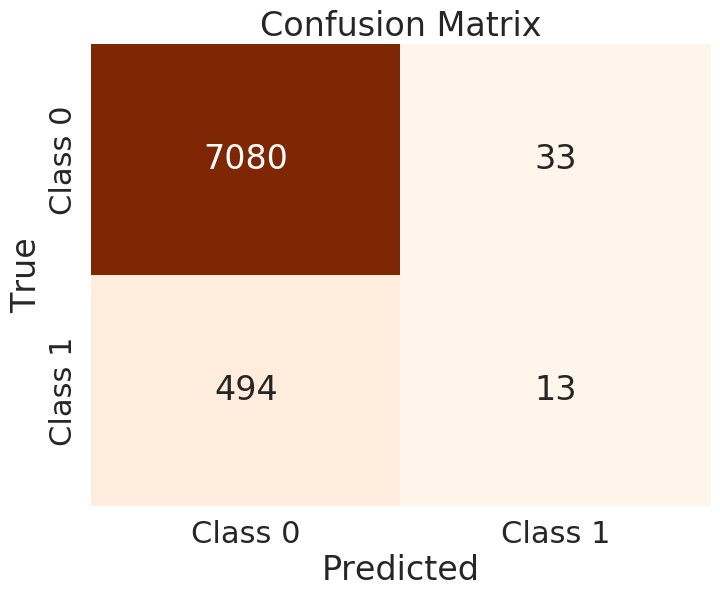

In [158]:
y_pred = mod_rf_uo_best.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Oranges", cbar=False,
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## SVC - random under and oversampling

In [0]:
over = RandomOverSampler(sampling_strategy=0.5)
under = RandomUnderSampler(sampling_strategy=0.5)
svc_ou_pipe = Pipeline([
            ("oversampling", over),
            ('undersampling', under),
            ('classification', SVC(probability=True))])

mod_svc_uo_best = pipe_fit(svc_ou_pipe, svc_param_grid, X_train, y_train)

In [0]:
evaluate_on_test(X_test, y_test, mod_svc_uo_best, "SVM - Under/Over")

# Pipeline - models (LR, DT, RF, SVM, XGBoost) - SMOTE

In [61]:
import imblearn
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [62]:
#LogisticRegression
lr_SMOTE_pipe = Pipeline([
        ('sampling', SMOTE()),
        ('classification', LogisticRegression(dual=False, solver="liblinear"))
    ])

#RandomForest
rf_SMOTE_pipe = Pipeline([
        ('sampling', SMOTE()),
        ('classification', RandomForestClassifier())
    ])

#DecisionTree
dt_pipe = Pipeline([
        ('sampling', SMOTE()),
        ('classification', tree.DecisionTreeClassifier())
    ])

#Linear Support Vector Classification
svc_SMOTE_pipe = Pipeline([
        ('sampling', SMOTE()),
        ('classification', SVC(probability=True))
    ])

#XGBoost
XGB_SMOTE_pipe = Pipeline([
        ('sampling', SMOTE()),
        ('classification', XGBClassifier())
    ])

## LR - SMOTE

In [63]:
model_lr_SMOTE = pipe_fit(lr_SMOTE_pipe, lr_param_grid, X_train, y_train)

CV Accuracy Score:  0.4270652185801315
CV F1 Macro Score:  0.35105414275718294
CV Average Precision Score:  0.07236882672139104
CV ROC AUC Score:  0.5221763826479578
Best parameters: {'classification__C': 1}
Train score: 0.07690


In [64]:
evaluate_on_test(X_test, y_test, model_lr_SMOTE, "LR - SMOTE")

Test Average Precision Score Minority:  0.083106631517732
Test Average Precision Score Majority:  0.9479270798797249
Classification report on test set
               precision    recall  f1-score   support

           0       0.95      0.39      0.55      7113
           1       0.08      0.71      0.14       507

    accuracy                           0.41      7620
   macro avg       0.51      0.55      0.34      7620
weighted avg       0.89      0.41      0.52      7620



## RF - SMOTE

In [0]:
model_rf_SMOTE = pipe_fit(rf_SMOTE_pipe, rf_param_grid, X_train, y_train)

In [0]:
evaluate_on_test(X_test, y_test, model_rf_SMOTE, "RF - SMOTE")

## SVM - SMOTE

In [0]:
svc_SMOTE_pipe = Pipeline([
        ('sampling', SMOTE()),
        ('classification', SVC(C = 10, gamma = 0.001, probability=True))
    ])

In [0]:
model_svc_SMOTE = pipe_fit(svc_SMOTE_pipe, svc_param_grid, X_train, y_train)

In [0]:
evaluate_on_test(X_test, y_test, model_svc_SMOTE, "SVM - SMOTE")

In [0]:
# X_train['ste_mvs'] = X_train['ste_mvs'].astype(float)
# X_train['ste_oad'] = X_train['ste_oad'].astype(float)

# X_test['ste_mvs'] = X_test['ste_mvs'].astype(float)
# X_test['ste_oad'] = X_test['ste_oad'].astype(float)

In [0]:
#evaluate_on_test(X_test, y_test, model_svc_SMOTE, "SVM - SMOTE")

## XGB - SMOTE

In [0]:
# model_XGB_SMOTE = pipe_fit(XGB_SMOTE_pipe, XGB_param_grid, X_train, y_train)

In [0]:
# evaluate_on_test(X_test, y_test, model_XGB_SMOTE, "XGB - SMOTE")

# Pipeline - models (LR, DT, RF, SVM, XGBoost) - Borderline SMOTE

In [0]:
from imblearn.over_sampling import BorderlineSMOTE
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

In [0]:
#LogisticRegression
lr_BSMOTE_pipe = Pipeline([
        ('sampling', BorderlineSMOTE()),
        ('classification', LogisticRegression(dual=False, solver="liblinear"))
    ])

#RandomForest
rf_BSMOTE_pipe = Pipeline([
        ('sampling', BorderlineSMOTE()),
        ('classification', RandomForestClassifier())
    ])

#Linear Support Vector Classification
svc_BSMOTE_pipe = Pipeline([
        ('sampling', BorderlineSMOTE()),
        ('classification', SVC())
    ])

#XGBoost
XGB_BSMOTE_pipe = Pipeline([
        ('sampling', BorderlineSMOTE()),
        ('classification', XGBClassifier())
    ])

## LR - Borderline SMOTE

In [0]:
from imblearn.pipeline import make_pipeline

In [0]:
model_lr_BSMOTE = pipe_fit(lr_BSMOTE_pipe, lr_param_grid, X_train, y_train)

In [0]:
evaluate_on_test(X_test, y_test, model_lr_BSMOTE, "LR - BSMOTE")

## RF - Borderline SMOTE

In [0]:
model_rf_BSMOTE = pipe_fit(rf_BSMOTE_pipe, rf_param_grid, X_train, y_train)

In [0]:
evaluate_on_test(X_test, y_test, model_rf_BSMOTE, "RF - BSMOTE")

## SVC - Borderline SMOTE

In [0]:
#Linear Support Vector Classification
svc_BSMOTE_pipe = Pipeline([
        ('sampling', BorderlineSMOTE()),
        ('classification', SVC(C = 10, gamma = 0.001, probability=True))
    ])

In [0]:
model_svc_BSMOTE = pipe_fit(svc_BSMOTE_pipe, svc_param_grid, X_train, y_train)

In [0]:
evaluate_on_test(X_test, y_test, model_svc_BSMOTE, "SVC - BSMOTE")

## XGBoost - Borderline SMOTE

In [0]:
# X_train['ste_mvs'] = X_train['ste_mvs'].astype(float)
# X_train['ste_oad'] = X_train['ste_oad'].astype(float)

# X_test['ste_mvs'] = X_test['ste_mvs'].astype(float)
# X_test['ste_oad'] = X_test['ste_oad'].astype(float)

In [0]:
# model_XGB_BSMOTE = pipe_fit(XGB_BSMOTE_pipe, XGB_param_grid, X_train, y_train)

In [0]:
# evaluate_on_test(X_test, y_test, model_XGB_BSMOTE, "XGB - BSMOTE")

# Feature importance

##  Best model LR SMOTE

In [0]:
best_logreg = model_lr_SMOTE.best_estimator_

In [0]:
best_logreg

In [0]:
importance_list = best_logreg.named_steps['classification'].coef_[0]

In [0]:
importance_list

In [0]:
feature_names = X.columns

# create a list of tuples, where each tuple contains the feature name and its coefficient
feature_importances = list(zip(feature_names, importance_list))

# sort the list by the absolute value of the coefficients (from highest to lowest)
feature_importances = sorted(feature_importances, key=lambda x: abs(x[1]), reverse=True)

# print the list of all feature importances in order from highest to lowest
for feature, importance in feature_importances:
    print(f"{feature}: {importance}")

In [0]:
features, coefficients = zip(*feature_importances)

# create a horizontal barplot with the feature names on the y-axis and the coefficients on the x-axis
fig, ax = plt.subplots(figsize=(10, len(features) * 0.5))
ax.barh(features, coefficients)

# set the axis labels and title
ax.set_xlabel('Coefficient')
ax.set_ylabel('Feature')
ax.set_title('Feature Importance Plot')

# show the plot
plt.show()

## Best model RF - Undersampling 0.5 + oversampling 0.5

In [69]:
best_rf = mod_rf_uo_best.best_estimator_
best_rf

Pipeline(steps=[('oversampling', RandomOverSampler(sampling_strategy=0.5)),
                ('undersampling', RandomUnderSampler(sampling_strategy=0.5)),
                ('classification',
                 RandomForestClassifier(bootstrap=False, max_depth=5,
                                        min_samples_leaf=2, n_estimators=20))])

In [71]:
X_train.columns

Index(['beschikbare_capaciteit_afname_huidig_mva_count', 'Bouwjaar', 'Oppervlakte [m2]', 'Potentie jaarlijks opwek [kWh]', 'a_bed_a', 'a_bed_bf', 'a_bed_gi', 'a_bed_hj', 'a_bed_kl', 'a_bed_mn', 'a_bed_oq', 'a_bed_ru', 'a_bedv', 'a_inw', 'a_man', 'a_nw_all', 'beschermdstadgezicht_ja', 'bev_dich', 'g_ele', 'g_gas_hu', 'g_gas_ko', 'p_ink_hi', 'type_bijeenkomstfunctie', 'type_celfunctie', 'type_gezondheidszorgfunctie', 'type_industriefunctie', 'type_kantoorfunctie', 'type_logiesfunctie', 'type_onderwijsfunctie', 'type_overige gebruiksfunctie', 'type_sportfunctie', 'type_winkelfunctie', 'type_woonfunctie'], dtype='object')

In [90]:
def get_feature_importance(model, ftrs):

    imp = model.best_estimator_._final_estimator.feature_importances_.tolist()
    result = pd.DataFrame({'feat':X_train.columns,'score':imp})
    result = result.sort_values(by=['score'],ascending=True)

    return result

In [91]:
feature_importances = get_feature_importance(mod_rf_uo_best, X_train.columns)
feature_importances

,feat,score
27,type_logiesfunctie,0.000000
23,type_celfunctie,0.000000
30,type_sportfunctie,0.000031
26,type_kantoorfunctie,0.000527
24,type_gezondheidszorgfunctie,0.000591
31,type_winkelfunctie,0.001858
22,type_bijeenkomstfunctie,0.002347
25,type_industriefunctie,0.002667
28,type_onderwijsfunctie,0.003295
4,a_bed_a,0.007357


In [92]:
feature_importances = feature_importances.sort_values(by=['score'],ascending=False)
feature_importances

,feat,score
1,Bouwjaar,0.305077
3,Potentie jaarlijks opwek [kWh],0.063811
18,g_ele,0.063768
5,a_bed_bf,0.063212
7,a_bed_hj,0.049976
2,Oppervlakte [m2],0.046724
11,a_bed_ru,0.039807
10,a_bed_oq,0.036221
6,a_bed_gi,0.035241
19,g_gas_hu,0.027774


In [94]:
import seaborn as sns

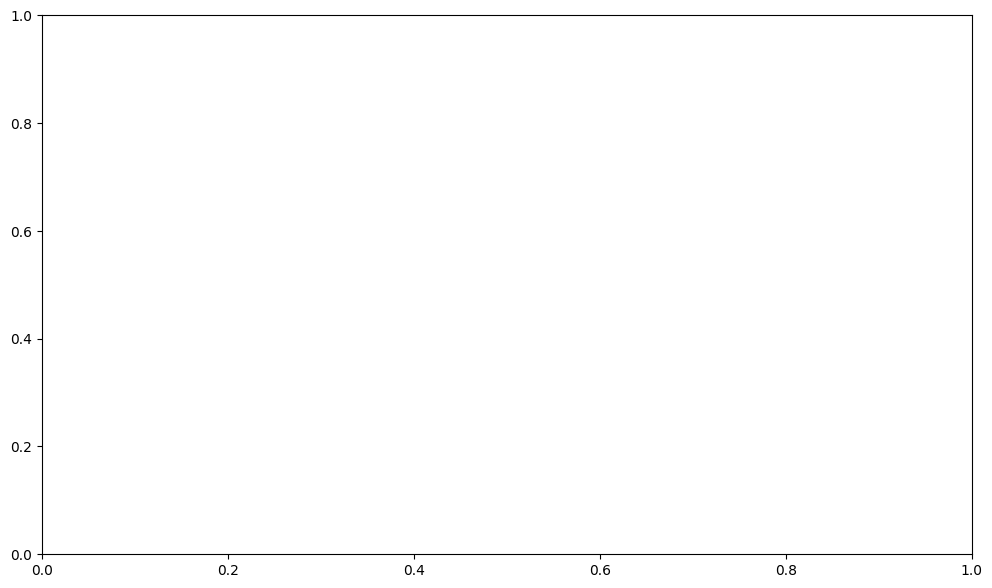

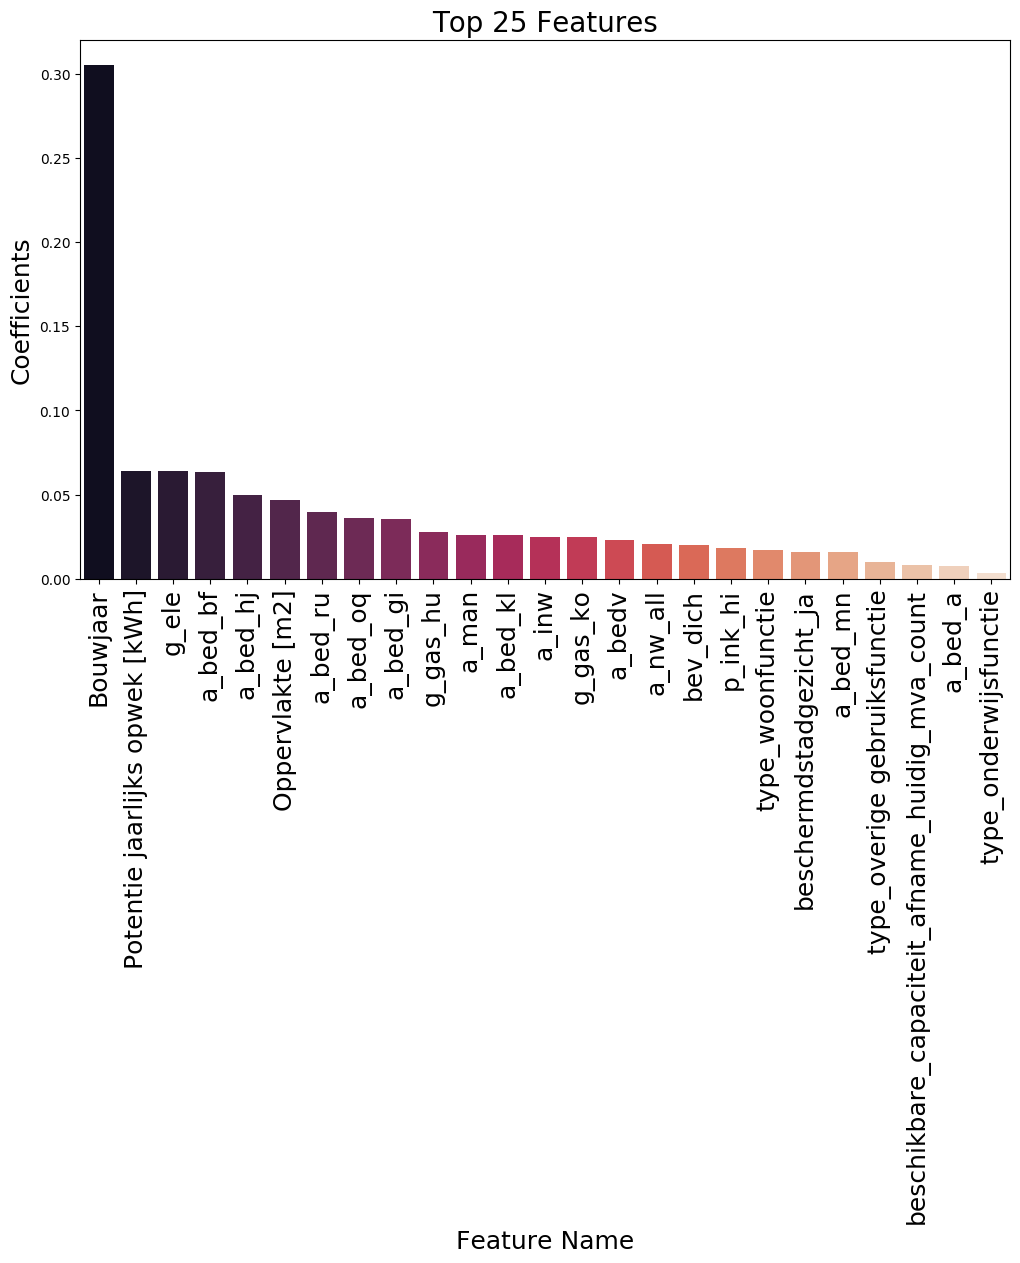

In [95]:
plt.subplots(1, 1, figsize=(12, 7))
ax = sns.barplot(x="feat",
            y="score",
            data=feature_importances.head(25), palette = "rocket")
#plt.xticks(rotation=90)

ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=18)
ax.set_title("Top 25 Features", fontsize=20)
ax.set_ylabel("Coefficients", fontsize=18)
ax.set_xlabel("Feature Name", fontsize=18)
plt.show()

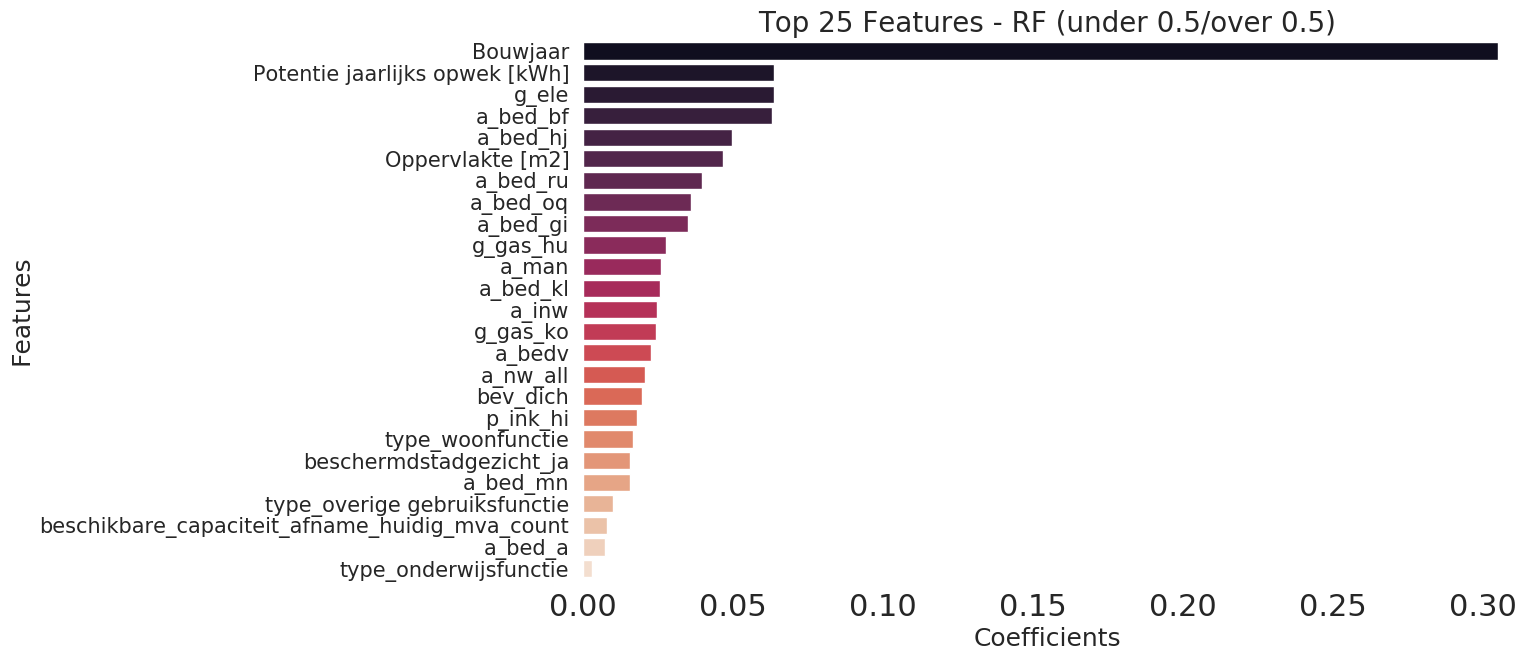

In [139]:
plt.subplots(1, 1, figsize=(12, 7))
ax = sns.barplot(x="score",
            y="feat",
            data=feature_importances.head(25), palette = "rocket")
#plt.xticks(rotation=90)

ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=15)
#ax.set_xticklabels(ax.get_xticklabels(), fontsize=16)
ax.set(xlim=(0, 0.31))
ax.set_title("Top 25 Features - RF (under 0.5/over 0.5)", fontsize=20)
ax.set_ylabel("Features", fontsize=18)
ax.set_xlabel("Coefficients", fontsize=18)
ax.set_facecolor('white')
sns.set(font_scale = 2)
plt.show()

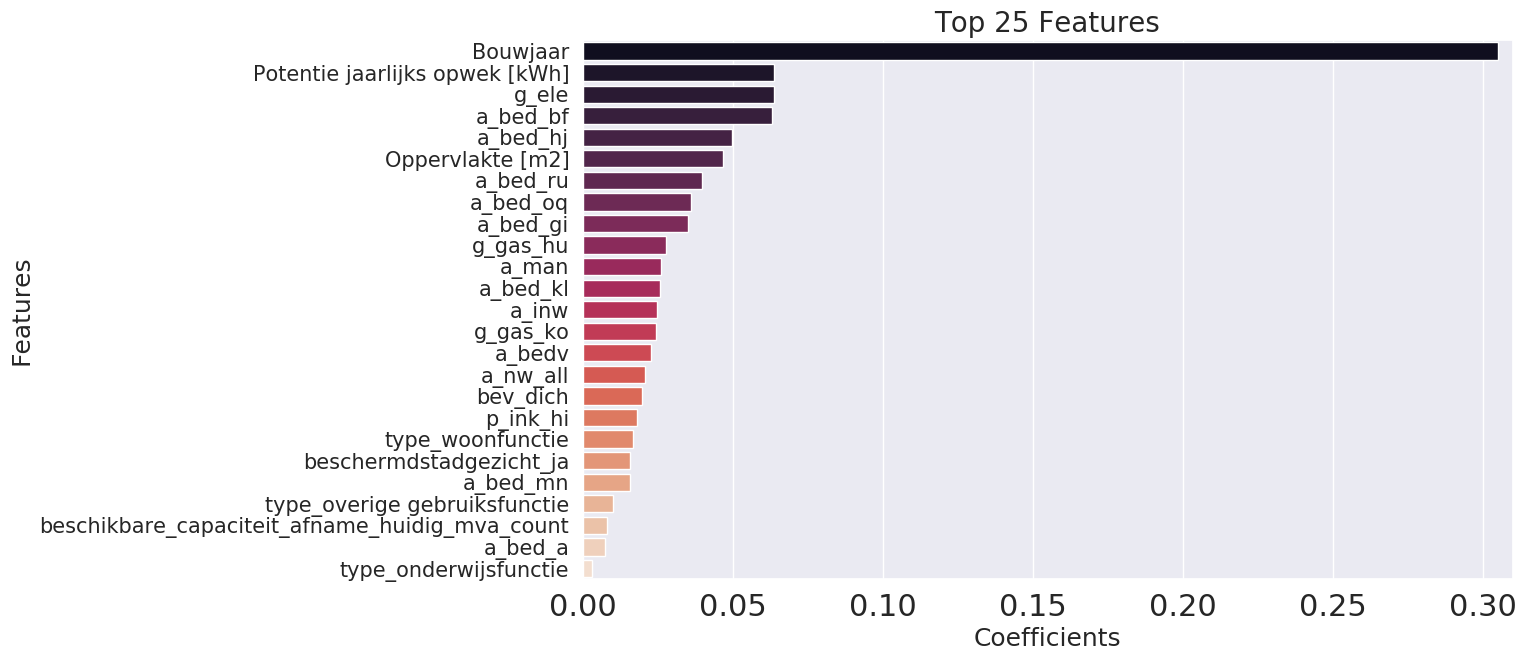

In [132]:
plt.subplots(1, 1, figsize=(12, 7))
ax = sns.barplot(x="score",
            y="feat",
            data=feature_importances.head(25), palette = "rocket")
#plt.xticks(rotation=90)

ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=15)
#ax.set_xticklabels(ax.get_xticklabels(), fontsize=16)
ax.set(xlim=(0, 0.31))
ax.set_title("Top 25 Features", fontsize=20)
ax.set_ylabel("Features", fontsize=18)
ax.set_xlabel("Coefficients", fontsize=18)
plt.show()

In [0]:
# # Write recipe outputs
# Final4_baseline1 = dataiku.Dataset("Final4_baseline1")
# Final4_baseline1.write_with_schema(Final4_baseline1_df)